# Analysing the effects on Prestige with Regression analysis

#Import libaries and datasets

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import statsmodels.api as sm
p = sm.datasets.get_rdataset("Prestige","carData").data

In [ ]:
p.columns

Index(['education', 'income', 'women', 'prestige', 'census', 'type'], dtype='object')

In [ ]:
p.shape

(102, 6)

In [ ]:
p.dtypes

education    float64
income         int64
women        float64
prestige     float64
census         int64
type          object
dtype: object

In [ ]:
p['prestige'].describe()

count    102.000000
mean      46.833333
std       17.204486
min       14.800000
25%       35.225000
50%       43.600000
75%       59.275000
max       87.200000
Name: prestige, dtype: float64

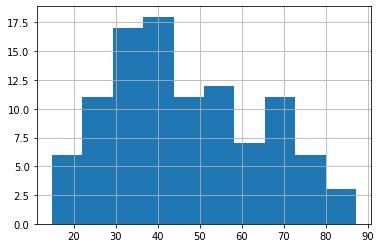

In [ ]:
p['prestige'].hist()

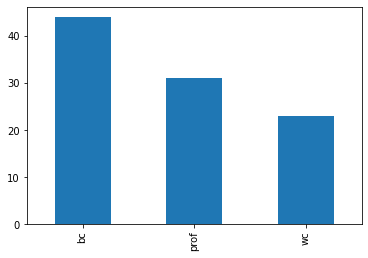

In [ ]:
p['type'].value_counts().plot(kind='bar')


In [ ]:
p.corr()

,education,income,women,prestige,census
education,1.000000,0.577580,0.061853,0.850177,-0.823088
income,0.577580,1.000000,-0.441059,0.714906,-0.361002
women,0.061853,-0.441059,1.000000,-0.118334,-0.227003
prestige,0.850177,0.714906,-0.118334,1.000000,-0.634510
census,-0.823088,-0.361002,-0.227003,-0.634510,1.000000


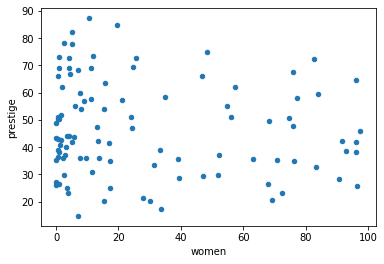

In [ ]:
p.plot.scatter(x='women',y='prestige')

In [ ]:
p.corr()

,education,income,women,prestige,census
education,1.000000,0.577580,0.061853,0.850177,-0.823088
income,0.577580,1.000000,-0.441059,0.714906,-0.361002
women,0.061853,-0.441059,1.000000,-0.118334,-0.227003
prestige,0.850177,0.714906,-0.118334,1.000000,-0.634510
census,-0.823088,-0.361002,-0.227003,-0.634510,1.000000


In [ ]:
import seaborn as sns

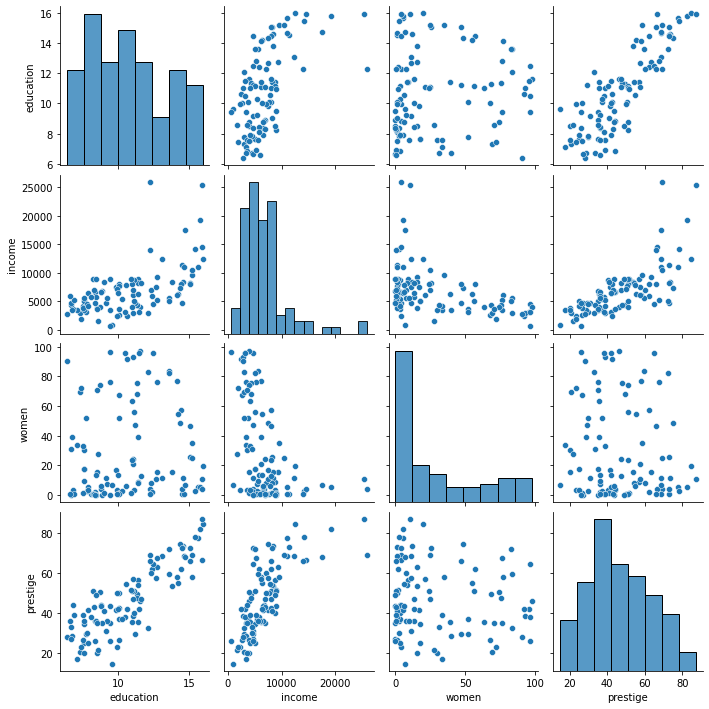

In [ ]:
sns.pairplot(p,vars=['education','income','women','prestige'])

Import ols from statsmodels.formula.api library

In [ ]:
from statsmodels.formula.api import ols

The ols() function fits a linear regression model to relate the independent variables to the target variable

In [ ]:
est = ols(formula='prestige ~ education + women + type', data = p)
est = est.fit()

View the model 

In [ ]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     96.95
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           2.56e-32
Time:                        16:29:09   Log-Likelihood:                -336.25
No. Observations:                  98   AIC:                             682.5
Df Residuals:                      93   BIC:                             695.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.4399      5.739     -0.077      0.939     -11.836      10.957
type[T.prof]     7.3160      4.222      1.733      0.086      -1.069      15.701
type[T.wc]      -3.1307      2.869     -1.091      0.278      -8.828       2.567
education        4.4339      0.663      6.685      0.000       3.117       5.751
women           -0.0578      0.028     -2.088      0.039      -0.113      -0.003
==============================================================================
Omnibus:                        1.428   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.332
Skew:                          -0.281   Prob(JB):                        0.514
Kurtosis:                       2.898   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has an R squared value of 0.807 indicating the model explains our target variable quit well